In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cu=pd.read_csv('customer.csv')
cu.head()

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0


In [3]:
cu.shape

(1500, 19)

In [4]:
cu.drop(columns=['HighSatisfaction'],inplace=True)

In [5]:
cu.shape

(1500, 18)

In [6]:
cu.isnull().sum()

CustomerID              0
Age                     0
Gender                  0
Income                  0
VisitFrequency          0
AverageSpend            0
PreferredCuisine        0
TimeOfVisit             0
GroupSize               0
DiningOccasion          0
MealType                0
OnlineReservation       0
DeliveryOrder           0
LoyaltyProgramMember    0
WaitTime                0
ServiceRating           0
FoodRating              0
AmbianceRating          0
dtype: int64

## No missing value

In [7]:
cu.head()

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5


### Customers Satisfaction based on ServiceRating

In [8]:
cu['ServiceRating'].value_counts(ascending=False)

ServiceRating
5    322
3    302
4    295
1    292
2    289
Name: count, dtype: int64

#### This shows that the Customers have a positive feedback based on servicerating 

<Axes: xlabel='ServiceRating', ylabel='count'>

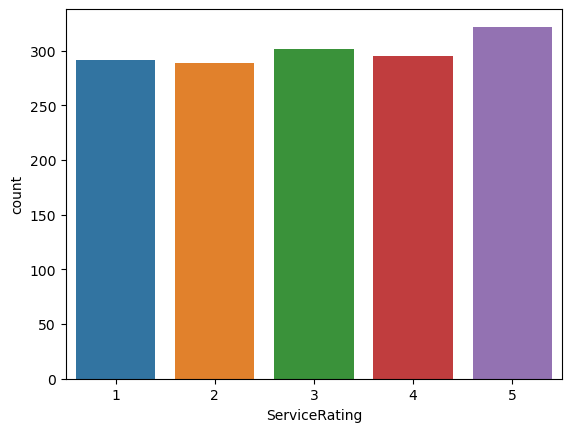

In [9]:
sns.countplot(x='ServiceRating',data=cu)

In [10]:
cu['FoodRating'].value_counts(ascending=False)

FoodRating
3    315
1    313
4    300
5    298
2    274
Name: count, dtype: int64

### This shows that the Customers have Neutral feedback based on FoodRating

<Axes: xlabel='FoodRating', ylabel='count'>

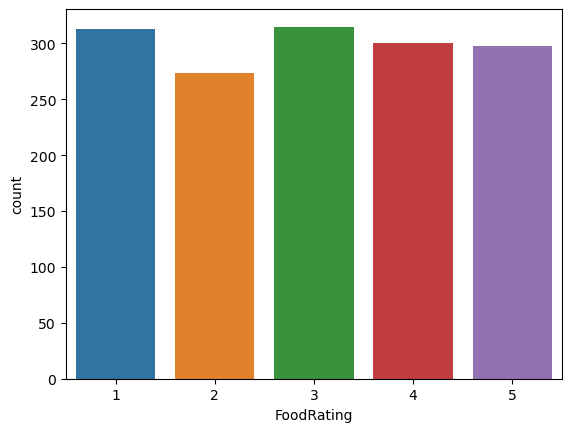

In [11]:
sns.countplot(x='FoodRating',data=cu)

In [12]:
cu['AmbianceRating'].value_counts(ascending=False)

AmbianceRating
1    324
5    317
2    298
4    293
3    268
Name: count, dtype: int64

###### This shows that the Customers have Negative feedback based on AmbianceRating

<Axes: xlabel='AmbianceRating', ylabel='count'>

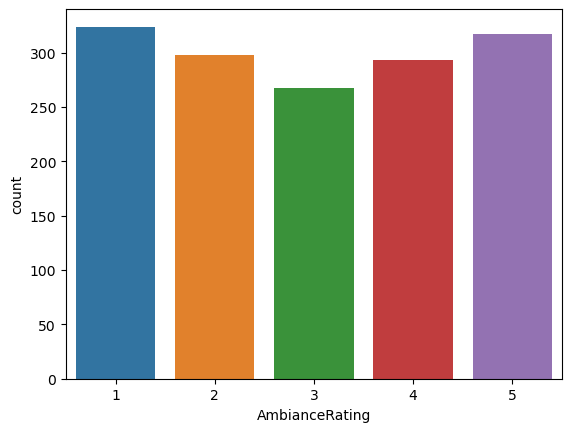

In [13]:
sns.countplot(x='AmbianceRating',data=cu)

In [14]:
cu.groupby('TimeOfVisit').OnlineReservation.value_counts().unstack()

OnlineReservation,0,1
TimeOfVisit,,
Breakfast,358,148
Dinner,346,146
Lunch,351,151


#### This shows that Customers with Lunch request more on OnlineReservation

In [15]:
cu.groupby('TimeOfVisit').	DeliveryOrder.value_counts().unstack()

DeliveryOrder,0,1
TimeOfVisit,,
Breakfast,302,204
Dinner,294,198
Lunch,296,206


###### This shows that Customers with Lunch request more on DeliveryOrder

In [16]:
cu['TimeOfVisit'].value_counts()

TimeOfVisit
Breakfast    506
Lunch        502
Dinner       492
Name: count, dtype: int64

<Axes: xlabel='TimeOfVisit', ylabel='count'>

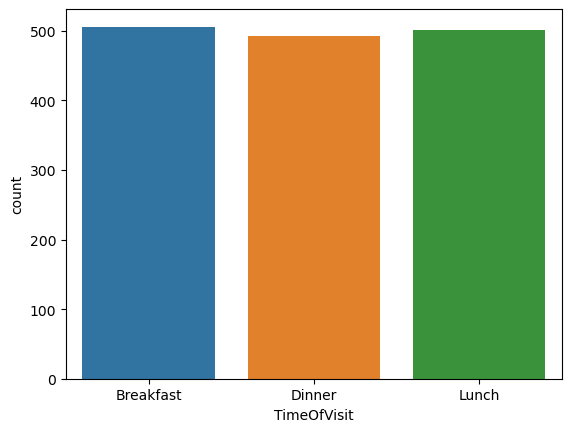

In [17]:
sns.countplot(x='TimeOfVisit',data=cu)

##### This shows that Customer visit more for breakfast

In [21]:
cu.groupby('TimeOfVisit').	FoodRating.value_counts().unstack()

FoodRating,1,2,3,4,5
TimeOfVisit,,,,,
Breakfast,101,88,111,112,94
Dinner,100,89,88,107,108
Lunch,112,97,116,81,96


### this shows that Customers who visit for dinner have the heighest positive feedback Rating and those for lunch as the heightest negative feedbackrating  

In [23]:
cu.groupby('PreferredCuisine').	FoodRating.value_counts().unstack()

FoodRating,1,2,3,4,5
PreferredCuisine,,,,,
American,55,41,55,65,54
Chinese,57,64,62,54,73
Indian,69,57,58,59,53
Italian,73,60,67,70,55
Mexican,59,52,73,52,63


##### this shows that the chinese Food has positve feedback while the italian has the nagative and mexican has neutral

In [24]:
cu.groupby('TimeOfVisit').	ServiceRating.value_counts().unstack()

ServiceRating,1,2,3,4,5
TimeOfVisit,,,,,
Breakfast,103,100,91,111,101
Dinner,97,93,96,94,112
Lunch,92,96,115,90,109


##### customers have positive statisfaction on the services rendered at dinner and negative at Breakfast

In [40]:
Visit=cu['TimeOfVisit'].value_counts()
Visit
labels=Visit.index
sizes=Visit.values

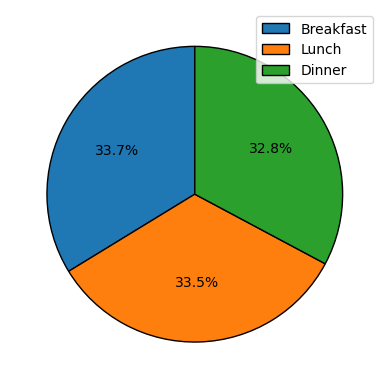

In [41]:
plt.pie(sizes,wedgeprops={'edgecolor':'black'},startangle=90,autopct='%1.1f%%')
plt .legend(labels,loc="best")